In [1]:
#import all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

In [2]:
#import train and test data
data_train = pd.read_csv("D:\\online_comp\\train_v9rqX0R.csv")
data_test = pd.read_csv("D:\\online_comp\\test_AbJTz2l.csv")

In [3]:
data_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
data_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [5]:
#Checking the details of each columns
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [7]:
#find out the min and max values of each column
data_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
data_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [9]:
#checking for null values in train data
data_train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
#checking for null values in test data
data_test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [11]:
#find out the percentage of missing values
data_train.isna().sum() / data_train.shape[0] * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [12]:
data_train['Item_Weight'].dtypes

dtype('float64')

In [13]:
#Replace the Item_Weight missing space with mean of the particular item_Identifier data

data_train['Item_Weight']= data_train['Item_Weight'].fillna(data_train.groupby('Item_Identifier')['Item_Weight'].transform('mean'))

In [14]:
#it still contains 4 missing values because there is no similar Item_identifier value there to replace
data_train.isna().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
#Replace the Item_Weight missing space with mean of the particular item_Identifier data(in test data)
data_test['Item_Weight']= data_test['Item_Weight'].fillna(data_test.groupby('Item_Identifier')['Item_Weight'].transform('mean'))

In [16]:
#it still contains 4 missing values because there is no similar Item_identifier value there to replace
data_test.isna().sum()

Item_Identifier                 0
Item_Weight                    20
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [17]:
##Replace the Item_Weight missing space with the Item_weight of similar Item_MRP  products(in train data)

In [18]:
data_train[data_train['Item_Weight'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [19]:
data_train[data_train['Item_MRP']==86.9198]


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
6795,FDL56,14.1,Low Fat,0.125676,Fruits and Vegetables,86.9198,OUT013,1987,High,Tier 3,Supermarket Type1,1133.8574


In [20]:
data_train['Item_Weight'] = np.where((data_train['Item_Identifier'] == 'FDN52'), 14.1, data_train['Item_Weight'])

In [21]:
data_train.isna().sum()

Item_Identifier                 0
Item_Weight                     3
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [22]:
###Again it contains some missing values so,Replaced the Item_Weight missing space with the Item_weight of similar Item_Type and Item_Fat_Content products(in train data)

In [23]:
data_train[data_train['Item_MRP']==88.9514]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
4260,FDS33,6.67,Regular,0.124127,Snack Foods,88.9514,OUT017,2007,NaN,Tier 2,Supermarket Type1,2125.2336
5575,FDS33,6.67,Regular,0.123679,Snack Foods,88.9514,OUT045,2002,NaN,Tier 2,Supermarket Type1,885.5140


In [24]:
data_train['Item_Weight'] = np.where((data_train['Item_Identifier'] == 'FDE52'), 6.67, data_train['Item_Weight'])


In [25]:
data_train.isna().sum()

Item_Identifier                 0
Item_Weight                     2
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [26]:
data_temp=data_train[(data_train['Item_Fat_Content']=="Regular") & (data_train['Item_Type']=="Baking Goods")]
data_temp['Item_Weight'].mean()

11.97329508196722

In [27]:
data_train['Item_Weight'] = np.where((data_train['Item_Identifier'] == 'FDQ60'), 11.97, data_train['Item_Weight'])

In [28]:
data_train[data_train['Item_MRP']==121.2098]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5022,FDQ60,11.97,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [29]:
data_train[data_train['Item_Weight'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.044,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.228


In [30]:
data_temp=data_train[(data_train['Item_Fat_Content']=="Low Fat") & (data_train['Item_Type']=="Snack Foods")]
data_temp['Item_Weight'].mean()

13.727344720496937

In [31]:
data_train['Item_Weight'] = np.where((data_train['Item_Identifier'] == 'FDK57'), 13.72, data_train['Item_Weight'])

In [32]:
data_train.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [33]:
#Do the similar process with testing data

In [34]:
data_test[data_test['Item_Weight'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
58,FDL58,NaN,Regular,0.129825,Snack Foods,263.2568,OUT019,1985,Small,Tier 1,Grocery Store
482,FDY57,NaN,Regular,0.120667,Snack Foods,94.6752,OUT027,1985,Medium,Tier 3,Supermarket Type3
882,FDH58,NaN,Low Fat,0.036761,Snack Foods,116.9834,OUT027,1985,Medium,Tier 3,Supermarket Type3
884,FDI45,NaN,Low Fat,0.037399,Fruits and Vegetables,173.1054,OUT027,1985,Medium,Tier 3,Supermarket Type3
1203,FDG50,NaN,Low Fat,0.015198,Canned,89.7146,OUT027,1985,Medium,Tier 3,Supermarket Type3
1297,FDG57,NaN,Low Fat,0.071948,Fruits and Vegetables,48.8034,OUT027,1985,Medium,Tier 3,Supermarket Type3
1300,FDJ09,NaN,LF,0.058112,Snack Foods,45.5744,OUT027,1985,Medium,Tier 3,Supermarket Type3
1571,FDF22,NaN,Low Fat,0.056555,Snack Foods,214.2218,OUT027,1985,Medium,Tier 3,Supermarket Type3
1741,FDI45,NaN,Low Fat,0.065800,Fruits and Vegetables,177.0054,OUT019,1985,Small,Tier 1,Grocery Store
2302,FDF22,NaN,Low Fat,0.099503,Snack Foods,212.5218,OUT019,1985,Small,Tier 1,Grocery Store


In [35]:
data_test[data_test['Item_MRP']==263.2568]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
58,FDL58,NaN,Regular,0.129825,Snack Foods,263.2568,OUT019,1985,Small,Tier 1,Grocery Store
931,FDB15,10.895,Low Fat,0.136148,Dairy,263.2568,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [36]:

data_test['Item_Weight'] = np.where((data_test['Item_Identifier'] == 'FDL58'), 10.895, data_test['Item_Weight'])

In [37]:
data_test[data_test['Item_MRP']==181.1660 ]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
464,NCP43,17.75,Low Fat,0.030359,Others,181.166,OUT027,1985,Medium,Tier 3,Supermarket Type3
3734,DRN47,NaN,Low Fat,0.029461,Hard Drinks,181.166,OUT019,1985,Small,Tier 1,Grocery Store


In [38]:
data_test['Item_Weight'] = np.where((data_test['Item_Identifier'] == 'DRN47'), 17.75, data_test['Item_Weight'])

In [39]:
data_test[data_test['Item_MRP']==80.2960]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4298,FDO22,NaN,Regular,0.017773,Snack Foods,80.296,OUT027,1985,Medium,Tier 3,Supermarket Type3
5653,FDO31,6.76,Regular,0.028977,Fruits and Vegetables,80.296,OUT035,2004,Small,Tier 2,Supermarket Type1


In [40]:
data_test['Item_Weight'] = np.where((data_test['Item_Identifier'] == 'FDO22'), 6.76, data_test['Item_Weight'])

In [41]:
data_test[data_test['Item_MRP']==261.6910]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
549,FDF39,14.85,Regular,0.000000,Dairy,261.691,OUT049,1999,Medium,Tier 1,Supermarket Type1
1679,FDO09,13.50,Regular,0.125785,Snack Foods,261.691,OUT018,2009,Medium,Tier 3,Supermarket Type2
5346,FDF05,NaN,Low Fat,0.047047,Frozen Foods,261.691,OUT019,1985,Small,Tier 1,Grocery Store


In [42]:
data_test['Item_Weight'] = np.where((data_test['Item_Identifier'] == 'FDF05'), 14.175, data_test['Item_Weight'])

In [43]:
data_test[data_test['Item_MRP']==258.5304]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5615,FDF04,NaN,Low Fat,0.013571,Frozen Foods,258.5304,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [44]:
data_test['Item_Weight'].isna().sum()

15

In [45]:
data_test[data_test['Item_Weight'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
482,FDY57,NaN,Regular,0.120667,Snack Foods,94.6752,OUT027,1985,Medium,Tier 3,Supermarket Type3
882,FDH58,NaN,Low Fat,0.036761,Snack Foods,116.9834,OUT027,1985,Medium,Tier 3,Supermarket Type3
884,FDI45,NaN,Low Fat,0.037399,Fruits and Vegetables,173.1054,OUT027,1985,Medium,Tier 3,Supermarket Type3
1203,FDG50,NaN,Low Fat,0.015198,Canned,89.7146,OUT027,1985,Medium,Tier 3,Supermarket Type3
1297,FDG57,NaN,Low Fat,0.071948,Fruits and Vegetables,48.8034,OUT027,1985,Medium,Tier 3,Supermarket Type3
1300,FDJ09,NaN,LF,0.058112,Snack Foods,45.5744,OUT027,1985,Medium,Tier 3,Supermarket Type3
1571,FDF22,NaN,Low Fat,0.056555,Snack Foods,214.2218,OUT027,1985,Medium,Tier 3,Supermarket Type3
1741,FDI45,NaN,Low Fat,0.065800,Fruits and Vegetables,177.0054,OUT019,1985,Small,Tier 1,Grocery Store
2302,FDF22,NaN,Low Fat,0.099503,Snack Foods,212.5218,OUT019,1985,Small,Tier 1,Grocery Store
2600,FDG50,NaN,Low Fat,0.026739,Canned,89.6146,OUT019,1985,Small,Tier 1,Grocery Store


In [46]:
data_train[data_train['Item_MRP']==258.5304]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8087,FDF04,17.5,Low Fat,0.013637,Frozen Foods,258.5304,OUT046,1997,Small,Tier 1,Supermarket Type1,6199.9296


In [47]:

data_test['Item_Weight'] = np.where((data_test['Item_Identifier'] == 'FDF04'), 17.5, data_test['Item_Weight'])

In [48]:
data_train[data_train['Item_MRP']==188.9556]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3795,FDG09,20.6,Regular,0.080236,Fruits and Vegetables,188.9556,OUT010,1998,NaN,Tier 3,Grocery Store,563.2668


In [49]:
data_test['Item_Weight'] = np.where((data_test['Item_Identifier'] == 'FDG09'), 20.6, data_test['Item_Weight'])

In [50]:
data_train[data_train['Item_MRP']==248.0092]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2091,FDT21,7.42,Low Fat,0.020375,Snack Foods,248.0092,OUT013,1987,High,Tier 3,Supermarket Type1,1245.046


In [51]:
data_test['Item_Weight'] = np.where((data_test['Item_Identifier'] == 'FDT21'), 7.42, data_test['Item_Weight'])

In [52]:
data_train[data_train['Item_MRP']==177.0054]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3845,FDV11,9.100,Regular,0.081652,Breads,177.0054,OUT035,2004,Small,Tier 2,Supermarket Type1,2101.2648
3878,FDD56,15.200,Regular,0.103989,Fruits and Vegetables,177.0054,OUT045,2002,NaN,Tier 2,Supermarket Type1,3677.2134
4233,NCY18,7.285,Low Fat,0.031001,Household,177.0054,OUT027,1985,Medium,Tier 3,Supermarket Type3,2101.2648
4380,FDD56,15.200,Regular,0.103759,Fruits and Vegetables,177.0054,OUT035,2004,Small,Tier 2,Supermarket Type1,2976.7918


In [53]:
data_test['Item_Weight'] = np.where((data_test['Item_Identifier'] == 'FDI45'), 15.200, data_test['Item_Weight'])

In [54]:
data_train[data_train['Item_MRP']==45.5744]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2240,FDR20,20.0,Regular,0.028167,Fruits and Vegetables,45.5744,OUT049,1999,Medium,Tier 1,Supermarket Type1,452.744


In [55]:
data_test['Item_Weight'] = np.where((data_test['Item_Identifier'] == 'FDJ09'), 20, data_test['Item_Weight'])

In [56]:
data_train[data_train['Item_MRP']==48.8034]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4506,FDL48,19.350,Regular,0.082266,Baking Goods,48.8034,OUT046,1997,Small,Tier 1,Supermarket Type1,340.2238
6920,NCA53,11.395,Low Fat,0.009898,Health and Hygiene,48.8034,OUT045,2002,NaN,Tier 2,Supermarket Type1,777.6544


In [57]:
data_test['Item_Weight'] = np.where((data_test['Item_Identifier'] == 'FDG57'), 19.350, data_test['Item_Weight'])

In [58]:
data_train[data_train['Item_MRP']==89.7146]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3880,FDG50,7.405,Low Fat,0.025562,Canned,89.7146,OUT010,1998,NaN,Tier 3,Grocery Store,182.4292
6638,FDG50,7.405,Low Fat,0.015296,Canned,89.7146,OUT049,1999,Medium,Tier 1,Supermarket Type1,547.2876


In [59]:

data_test['Item_Weight'] = np.where((data_test['Item_Identifier'] == 'FDG50'), 7.405, data_test['Item_Weight'])

In [60]:
data_test['Item_Weight'].isna().sum()

6

In [61]:
data_test[data_test['Item_Weight'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
482,FDY57,NaN,Regular,0.120667,Snack Foods,94.6752,OUT027,1985,Medium,Tier 3,Supermarket Type3
882,FDH58,NaN,Low Fat,0.036761,Snack Foods,116.9834,OUT027,1985,Medium,Tier 3,Supermarket Type3
1571,FDF22,NaN,Low Fat,0.056555,Snack Foods,214.2218,OUT027,1985,Medium,Tier 3,Supermarket Type3
2302,FDF22,NaN,Low Fat,0.099503,Snack Foods,212.5218,OUT019,1985,Small,Tier 1,Grocery Store
3875,NCJ30,NaN,low fat,0.141191,Household,167.9790,OUT019,1985,Small,Tier 1,Grocery Store
5609,FDP28,NaN,Regular,0.080250,Frozen Foods,259.4936,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [62]:
data_temp=data_test[(data_test['Item_Fat_Content']=="Regular") & (data_test['Item_Type']=="Snack Foods")]
data_temp['Item_Weight'].mean()

11.260910493827165

In [63]:
data_test['Item_Weight'] = np.where((data_test['Item_Identifier'] == 'FDY57'), 11.26, data_test['Item_Weight'])

In [64]:
data_temp=data_test[(data_test['Item_Fat_Content']=="Low Fat") & (data_test['Item_Type']=="Snack Foods")]
data_temp['Item_Weight'].mean()

13.758548780487818

In [65]:
data_test['Item_Weight'] = np.where((data_test['Item_Identifier'] == 'FDH58'), 13.75, data_test['Item_Weight'])

In [66]:
data_test['Item_Weight'] = np.where((data_test['Item_Identifier'] == 'FDF22'),13.75, data_test['Item_Weight'])

In [67]:
data_temp=data_test[(data_test['Item_Fat_Content']=="Low Fat") & (data_test['Item_Type']=="Household")]
data_temp['Item_Weight'].mean()

13.197803030303058

In [68]:
data_test['Item_Weight'] = np.where((data_test['Item_Identifier'] == 'NCJ30'), 13.19, data_test['Item_Weight'])

In [69]:
data_temp=data_test[(data_test['Item_Fat_Content']=="Regular") & (data_test['Item_Type']=="Frozen Foods")]
data_temp['Item_Weight'].mean()

12.618535714285692

In [70]:
data_test['Item_Weight'] = np.where((data_test['Item_Identifier'] == 'FDP28'), 12.62, data_test['Item_Weight'])

In [71]:
data_test.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [72]:
#Handling the Outlet_Size missing values in test data

In [73]:
from scipy.stats import mode

In [74]:
data_test['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [75]:
#Drop the index of test data
data_test.reset_index(drop=True, inplace=True)

In [76]:
#Fill the missing values with varaiable unknown
data_test['Outlet_Size'] = data_test['Outlet_Size'].fillna('unknown')
#Find out the mode value of Outlet_Size based on outlet type
outlet_type_mode_size = data_test.pivot_table(values='Outlet_Size', index='Outlet_Type', aggfunc=(lambda x:mode(x).mode[0]))
outlet_type_mode_size

,Outlet_Size
Outlet_Type,
Grocery Store,unknown
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


In [77]:
# create a mask of the missing data in Item_Weight
null_mask_size = data_test['Outlet_Size']=='unknown'

# impute the Outlet_Size missing values with mode of the Outlet_Size based on Outlet_type 
data_test.loc[null_mask_size, 'Outlet_Size'] = data_test.loc[null_mask_size, 'Outlet_Type'].apply(lambda x: outlet_type_mode_size.loc[x])


In [78]:
data_test['Outlet_Size'].isna().sum()

0

In [79]:
data_test.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [80]:
#missing values of Outlet_Identifier handling in train data 

In [81]:
data_train.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [82]:
#Find out the mode value of outlet_size when outlet_type is Grocery Store
data_temp=data_train[(data_train['Outlet_Type']=="Grocery Store")]
data_temp['Outlet_Size'].mode()[0]

'Small'

In [83]:
#Replace missing values of outlet_size with mode value of outlet_type when outlet_type is Grocery Store
data_train['Outlet_Size'] = data_train['Outlet_Size'].fillna(pd.Series(np.where(data_train['Outlet_Type']=="Grocery Store",'Small',data_train['Outlet_Size'])))

In [84]:
##Find out the mode value of outlet_size when outlet_type is Supermarket Type1
data_temp=data_train[(data_train['Outlet_Type']=="Supermarket Type1")]
data_temp['Outlet_Size'].mode()[0]

'Small'

In [85]:
#Replace missing values of outlet_size with mode value of outlet_type when outlet_type is Supermarket Type1
data_train['Outlet_Size'] = data_train['Outlet_Size'].fillna(pd.Series(np.where(data_train['Outlet_Type']=="Supermarket Type1",'Small',data_train['Outlet_Size'])))

In [86]:
data_train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [87]:
data_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.874829,0.066132,140.992782,1997.831867,2181.288914
std,4.645533,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026989,93.826500,1987.000000,834.247400
50%,12.650000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [88]:
#It shows that Item_Visibility contains some scores as '0'

In [89]:
(data_train['Item_Visibility']==0).sum()

526

In [90]:
#Replace 0 values with nan
data_train['Item_Visibility'] = data_train['Item_Visibility'].replace({'0':np.nan, 0:np.nan})

In [91]:
data_train['Item_Visibility'].isna().sum()

526

In [92]:
table = data_train.pivot_table(values='Item_Visibility', index='Item_Type', columns='Outlet_Type', aggfunc='mean')

In [93]:
# define function that returns the mean values based on item type and outlet type
def find_mean(x):
    return table.loc[x['Item_Type'], x['Outlet_Type']]

# replace missing values by mean of the data
data_train['Item_Visibility'].fillna(data_train[data_train['Item_Visibility'].isnull()].apply(find_mean, axis=1), inplace=True)

In [94]:
data_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.678679,0.065684,141.023273,1997.828903
std,4.656073,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.630000,0.027047,94.412000,1987.000000
50%,12.350000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [95]:
#It shows that Item_Visibility contains some scores as '0' in test data too

In [96]:
(data_test['Item_Visibility']==0).sum()

353

In [97]:
#Replace 0 values with nan
data_test['Item_Visibility'] = data_test['Item_Visibility'].replace({'0':np.nan, 0:np.nan})
table = data_test.pivot_table(values='Item_Visibility', index='Item_Type', columns='Outlet_Type', aggfunc='mean')
# define function that returns the mean values based on item type and outlet type
def find_mean(x):
    return table.loc[x['Item_Type'], x['Outlet_Type']]

# replace missing values by mean of the data
data_test['Item_Visibility'].fillna(data_test[data_test['Item_Visibility'].isnull()].apply(find_mean, axis=1), inplace=True)

In [98]:
data_test['Item_Visibility'].isna().sum()

0

In [99]:
data_train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [100]:
#checking the unique values of Outlet_Establishment_Year
data_train['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [101]:
#Change the Outlet_Establishment_Year into a period of year
data_train['Outlet_Years'] = 2013 - data_train['Outlet_Establishment_Year']
data_train['Outlet_Years'].describe()

count    8523.000000
mean       15.168133
std         8.371760
min         4.000000
25%         9.000000
50%        14.000000
75%        26.000000
max        28.000000
Name: Outlet_Years, dtype: float64

In [102]:
#Change the Outlet_Establishment_Year into a period of year
data_test['Outlet_Years'] = 2013 - data_test['Outlet_Establishment_Year']
data_test['Outlet_Years'].describe()

count    5681.000000
mean       15.171097
std         8.372256
min         4.000000
25%         9.000000
50%        14.000000
75%        26.000000
max        28.000000
Name: Outlet_Years, dtype: float64

In [103]:
#drop Outlet_Establishment_Year column from test dataset
data_test1=data_test.drop('Outlet_Establishment_Year',axis=1)

In [104]:
#drop Outlet_Establishment_Year column from train dataset
data_train1=data_train.drop('Outlet_Establishment_Year',axis=1)

In [105]:
#Check the unique values of Item_Fat_Content
data_train1['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [106]:
#It contains low fat, LF,low fat for same data,so replaced it to Low Fat
# for Regular and reg  changed to Regular
data_train1.loc[(data_train1['Item_Fat_Content'] == "low fat")|(data_train1['Item_Fat_Content'] == "LF")
                ,'Item_Fat_Content'] = 'Low Fat'
data_train1.loc[(data_train1['Item_Fat_Content'] == "reg"),'Item_Fat_Content'] = 'Regular'

In [107]:
data_train1['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [108]:
#Do the same things with test data
data_test1['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [109]:
data_test1.loc[(data_test1['Item_Fat_Content'] == "LF")|(data_test1['Item_Fat_Content'] == "low fat")
                ,'Item_Fat_Content'] = 'Low Fat'
data_test1.loc[(data_test1['Item_Fat_Content'] == "reg"),'Item_Fat_Content'] = 'Regular'

In [110]:
data_test1['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [111]:
# all numeric (float and int) variables in the train dataset
data_numeric = data_train1.select_dtypes(include=['float64', 'int'])
data_numeric.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years
0,9.30,0.016047,249.8092,3735.1380,14
1,5.92,0.019278,48.2692,443.4228,4
2,17.50,0.016760,141.6180,2097.2700,14
3,19.20,0.120401,182.0950,732.3800,15
4,8.93,0.059544,53.8614,994.7052,26


In [112]:
#Find out the correlation between all the numeric features in the train dataset
cor = data_numeric.corr()
cor

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years
Item_Weight,1.000000,-0.017302,0.026073,0.013091,0.013222
Item_Visibility,-0.017302,1.000000,-0.005828,-0.140833,0.082643
Item_MRP,0.026073,-0.005828,1.000000,0.567574,-0.005020
Item_Outlet_Sales,0.013091,-0.140833,0.567574,1.000000,0.049135
Outlet_Years,0.013222,0.082643,-0.005020,0.049135,1.000000


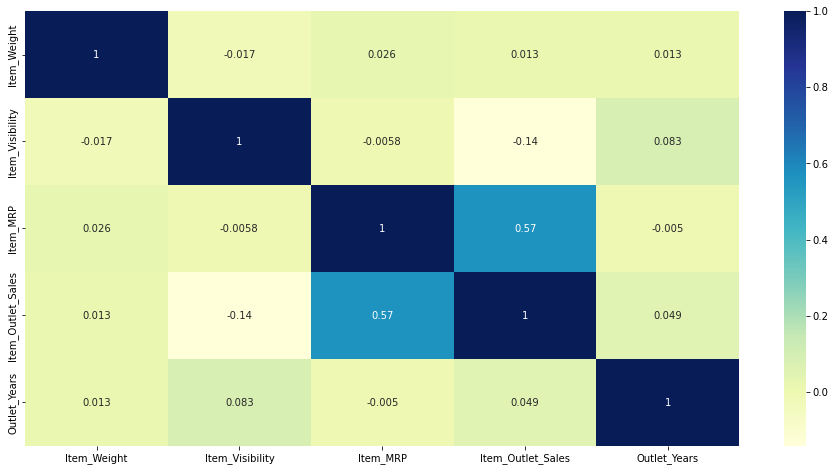

In [113]:
#draw a heat map for find out the relation between the features
plt.figure(figsize=(16,8))
# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [114]:
#Group the categorical features in the dataset
data_categorical = data_train1.select_dtypes(include=['object'])
data_categorical.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Small,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [115]:
#check the unique values of Outlet_Location_Type
data_train1['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [116]:
#change the Item_type  with Item_Identifier's first two varaiables and stored the value in another varable called item
data_train1['Item'] = data_train1['Item_Identifier'].apply(lambda x: x[0:2])
data_train1['Item'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [117]:
#Again changed each abbrevation with food,Non-Consumable and drinks
data_train1['Item'] =data_train1['Item'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
data_train1['Item'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item, dtype: int64

In [118]:
#Based on the value of item (if it is Non-Consumable) changed the Item_Fat_Content to Non-Edible(because non-consumable foods are not edible)
data_train1.loc[data_train1['Item']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data_train1['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [119]:
#change the Item_type  with Item_Identifier's first two varaiables and stored the value in another varable called item
data_test1['Item'] = data_test1['Item_Identifier'].apply(lambda x: x[0:2])
data_test1['Item'].unique()

array(['FD', 'NC', 'DR'], dtype=object)

In [120]:
#Again changed each abbrevation with food,Non-Consumable and drinks
data_test1['Item'] =data_test1['Item'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
data_test1['Item'].value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: Item, dtype: int64

In [121]:
#Based on the value of item (if it is Non-Consumable) changed the Item_Fat_Content to Non-Edible(because non-consumable foods are not edible)
data_test1.loc[data_test1['Item']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data_test1['Item_Fat_Content'].value_counts()

Low Fat       2581
Regular       2013
Non-Edible    1087
Name: Item_Fat_Content, dtype: int64

In [122]:
data_train1.apply(lambda x: len(x.unique()))

Item_Identifier         1559
Item_Weight              448
Item_Fat_Content           3
Item_Visibility         7938
Item_Type                 16
Item_MRP                5938
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
Item_Outlet_Sales       3493
Outlet_Years               9
Item                       3
dtype: int64

In [123]:
#Remove the Item_Type column because it is replaced with item column
data_train1=data_train1.drop('Item_Type',axis=1)

In [124]:
data_train1.apply(lambda x: len(x.unique()))

Item_Identifier         1559
Item_Weight              448
Item_Fat_Content           3
Item_Visibility         7938
Item_MRP                5938
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
Item_Outlet_Sales       3493
Outlet_Years               9
Item                       3
dtype: int64

In [125]:
data_test1.apply(lambda x: len(x.unique()))

Item_Identifier         1543
Item_Weight              442
Item_Fat_Content           3
Item_Visibility         5331
Item_Type                 16
Item_MRP                4402
Outlet_Identifier         10
Outlet_Size                4
Outlet_Location_Type       3
Outlet_Type                4
Outlet_Years               9
Item                       3
dtype: int64

In [126]:
#Remove the Item_Type column because it is replaced with item column
data_test1=data_test1.drop('Item_Type',axis=1)

In [127]:
data_test1.apply(lambda x: len(x.unique()))

Item_Identifier         1543
Item_Weight              442
Item_Fat_Content           3
Item_Visibility         5331
Item_MRP                4402
Outlet_Identifier         10
Outlet_Size                4
Outlet_Location_Type       3
Outlet_Type                4
Outlet_Years               9
Item                       3
dtype: int64

In [128]:
#Drop the index column of train and test dataset
data_train1.reset_index(drop=True, inplace=True)
data_test1.reset_index(drop=True, inplace=True)

In [129]:
X_numeric = data_train1.select_dtypes(include=['float64', 'int'])
X_numeric.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.874829,0.070440,140.992782,2181.288914,15.168133
std,4.645533,0.048885,62.275067,1706.499616,8.371760
min,4.555000,0.003575,31.290000,33.290000,4.000000
25%,8.785000,0.033085,93.826500,834.247400,9.000000
50%,12.650000,0.060700,143.012800,1794.331000,14.000000
75%,16.850000,0.096335,185.643700,3101.296400,26.000000
max,21.350000,0.328391,266.888400,13086.964800,28.000000


In [130]:
data_categorical = data_train1.select_dtypes(include=['object'])
data_categorical.head()

,Item_Identifier,Item_Fat_Content,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item
0,FDA15,Low Fat,OUT049,Medium,Tier 1,Supermarket Type1,Food
1,DRC01,Regular,OUT018,Medium,Tier 3,Supermarket Type2,Drinks
2,FDN15,Low Fat,OUT049,Medium,Tier 1,Supermarket Type1,Food
3,FDX07,Regular,OUT010,Small,Tier 3,Grocery Store,Food
4,NCD19,Non-Edible,OUT013,High,Tier 3,Supermarket Type1,Non-Consumable


In [133]:
#store the independent variables into x and dependent variable to y_train
X = data_train1.drop(["Item_Outlet_Sales","Item_Identifier"],axis=1)
y_train = data_train1['Item_Outlet_Sales']
#Drop the column Item_Identifier from test data
data_test1 = data_test1.drop("Item_Identifier",axis=1)

In [134]:
#Apply label encoding to all categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for Outlet_Identifier
X['Outlet'] = le.fit_transform(X['Outlet_Identifier'])
#Remove Outlet_Identifier
X = X.drop("Outlet_Identifier",axis=1)
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item','Outlet_Type','Outlet']
for i in var_mod:
    X[i] = le.fit_transform(X[i])

In [135]:
#Apply label encoding to all categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for Outlet_Identifier
data_test1['Outlet'] = le.fit_transform(data_test1['Outlet_Identifier'])
#Remove Outlet_Identifier
data_test1 =data_test1.drop("Outlet_Identifier",axis=1)
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item','Outlet_Type','Outlet']
for i in var_mod:
    data_test1[i] = le.fit_transform(data_test1[i])

In [136]:
#Read the submission file
submission = pd.read_csv("D:\\online_comp\\sample_submission_8RXa3c6.csv")
submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000
...,...,...,...
5676,FDB58,OUT046,1000
5677,FDD47,OUT018,1000
5678,NCO17,OUT045,1000
5679,FDJ26,OUT017,1000


In [140]:
# Create an instance of the class-RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=45,max_depth=16,n_estimators=300)
# Use the fit method on training data
rf_reg.fit(X, y_train)
# Use the predict method on test data
prediction = rf_reg.predict(data_test1)

In [141]:
#Substitute the 'Item_Outlet_Sales' values on submission dataset with prediction values
submission['Item_Outlet_Sales'] = prediction
#convert submission file to CSV file
submission.to_csv('submit8_file.csv',index=False)